<a href="https://colab.research.google.com/github/Arnavdas/Pondicherry-Tourism-Data-analysis/blob/master/Pondi_Tourist_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import xlrd 
import os
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


Saving Quarter-I,2018-sample - (1).xlsx to Quarter-I,2018-sample - (1).xlsx


In [0]:
xls = pd.ExcelFile(io.BytesIO(uploaded['Quarter-I,2018-sample - (1).xlsx']))
#xls = pd.ExcelFile('C:/Users/LENOVO/Desktop/Quarter-I,2018-sample - (1).xlsx')
df1 = pd.read_excel(xls, 'WS-Form I')
df2 = pd.read_excel(xls, 'Jan18')
df3 = pd.read_excel(xls, 'Feb18')

In [0]:
sns.set_style('whitegrid')

In [4]:
df1.columns

Index(['Unnamed: 0', 'Name of the Hotels',
       'MONTHLY DATA ON NUMBER OF GUESTS CHECKED IN AND THEIR B. N. S.',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [5]:
df1.shape

(272, 16)

In [6]:
df1.head(2)

,Unnamed: 0,Name of the Hotels,MONTHLY DATA ON NUMBER OF GUESTS CHECKED IN AND THEIR B. N. S.,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,Jan'2018,NaN,NaN,NaN,Feb'2018,NaN,NaN,NaN,Mar'2018,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,No.of Tourists,NaN,B.N.S.,NaN,No. of Tourists,NaN,B.N.S,NaN,No. of Tourists,NaN,B.N.S.,NaN,NaN,NaN


In [7]:
tags = df1.iloc(1)[1:14][0:]# ignores/trims unnecessary columns for df1 table
tags.shape

(272, 13)

In [8]:
tags.iloc(1)[1:][:].head(2)# omits the hotel columns

,MONTHLY DATA ON NUMBER OF GUESTS CHECKED IN AND THEIR B. N. S.,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Jan'2018,NaN,NaN,NaN,Feb'2018,NaN,NaN,NaN,Mar'2018,NaN,NaN,NaN
1,No.of Tourists,NaN,B.N.S.,NaN,No. of Tourists,NaN,B.N.S,NaN,No. of Tourists,NaN,B.N.S.,NaN


In [9]:
hh = []
for j in range(len(tags)):
        t = pd.notna(tags.iloc(1)[1:][j:j+1].to_numpy()).any() #checks if all values in a row are nan(dropna won't work here)
        if not t:
            hh.append(j)
#print(hh)
tags.drop(tags.index[hh],inplace = True) 
tags.shape

(73, 13)

In [0]:
# separates 3 regions in pondicherry
pondi = tags[:14]
karaikal = tags[17:53]
yanam  = tags[59:67]

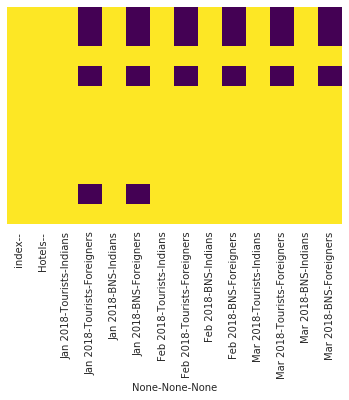

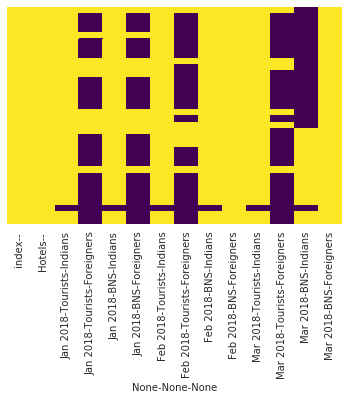

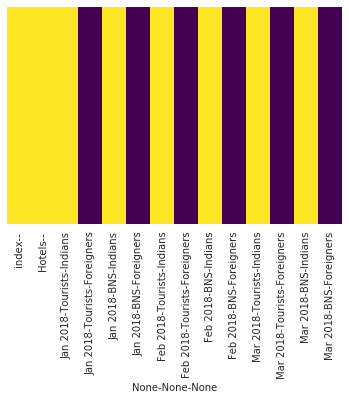

In [57]:
sns.heatmap(pondi.notna(), yticklabels = False, cbar=False,cmap='viridis')
plt.show()
sns.heatmap(karaikal.notna(), yticklabels = False, cbar=False,cmap='viridis')
plt.show()
sns.heatmap(yanam.notna(), yticklabels = False, cbar=False,cmap='viridis')
plt.show()

In [0]:
# hotels of 3 places
pondi_hotels = pondi.iloc(1)[:1][3:]
karaikal_hotels = karaikal.iloc(1)[:1][2:]
yanam_hotels = yanam.iloc(1)[:1][4:]

In [0]:
# creating multindex for setting up tables
yanam = yanam.iloc(1)[1:][4:]; pondi = pondi.iloc(1)[1:][3:]; karaikal = karaikal.iloc(1)[1:][2:]
coll = pd.MultiIndex.from_product([['Jan 2018','Feb 2018','Mar 2018'],['Tourists','BNS'],['Indians','Foreigners']])
yanam.set_axis(coll, axis = 1, inplace = True)
pondi.set_axis(coll, axis = 1, inplace = True)
karaikal.set_axis(coll, axis = 1, inplace = True)

In [0]:
# respective hotels are inserted back to the table
yanam.insert(0,'Hotels',yanam_hotels,True)
pondi.insert(0,'Hotels',pondi_hotels,True)
karaikal.insert(0,'Hotels',karaikal_hotels,True)
pondi.reset_index(inplace = True)
yanam.reset_index(inplace = True)
karaikal.reset_index(inplace = True)

In [14]:
yanam.head(2)

index             Hotels Jan 2018  ...   Mar 2018                   
                           Tourists  ...   Tourists     BNS           
                            Indians  ... Foreigners Indians Foreigners
0   253  Govt. Guest House      880  ...        NaN     384        NaN
1   255   G.V.S. Residency     2175  ...        NaN    2226        NaN

[2 rows x 14 columns]

In [15]:
pondi.head(2)

index                      Hotels Jan 2018  ...   Mar 2018                   
                                    Tourists  ...   Tourists     BNS           
                                     Indians  ... Foreigners Indians Foreigners
0     4  Govt.Tourist Home, Upallam      802  ...        NaN     821        NaN
1     6   Youth Hostel, Solai Nagar     1199  ...        NaN     832        NaN

[2 rows x 14 columns]

In [16]:
karaikal.head(2)

index                         Hotels Jan 2018  ...   Mar 2018                   
                                       Tourists  ...   Tourists     BNS           
                                        Indians  ... Foreigners Indians Foreigners
0   201  Govt.Tourist Home, Kovilpathu      506  ...          3     NaN          3
1   202    State Guest House, Karaikal       20  ...        NaN     NaN          0

[2 rows x 14 columns]

**DF2 preprocessing**

In [18]:
df2.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Australia', 'Unnamed: 3', 'Bangladesh',
       'Unnamed: 5', 'Canada', 'Unnamed: 7', 'France', 'Unnamed: 9', 'Germany',
       'Unnamed: 11', 'Iran', 'Unnamed: 13', 'Italy', 'Unnamed: 15', 'Japan',
       'Unnamed: 17', 'Malasiya', 'Unnamed: 19', 'Pakistan', 'Unnamed: 21',
       'Singapore', 'Unnamed: 23', 'Soudi Arabia', 'Unnamed: 25', 'Sri Lanka',
       'Unnamed: 27', 'Swoz', 'Unnamed: 29', 'UAE', 'Unnamed: 31', 'UK',
       'Unnamed: 33', 'USA', 'Unnamed: 35', 'Others', 'Unnamed: 37',
       'GRAND TOTAL', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41'],
      dtype='object')

In [19]:
df2.head(2)

,Unnamed: 0,Unnamed: 1,Australia,Unnamed: 3,Bangladesh,Unnamed: 5,Canada,Unnamed: 7,France,Unnamed: 9,Germany,Unnamed: 11,Iran,Unnamed: 13,Italy,Unnamed: 15,Japan,Unnamed: 17,Malasiya,Unnamed: 19,Pakistan,Unnamed: 21,Singapore,Unnamed: 23,Soudi Arabia,Unnamed: 25,Sri Lanka,Unnamed: 27,Swoz,Unnamed: 29,UAE,Unnamed: 31,UK,Unnamed: 33,USA,Unnamed: 35,Others,Unnamed: 37,GRAND TOTAL,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,Sl.No.,Name of the Hotels,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,NOS,BNS,NaN,NaN
1,NaN,PUDUCHERRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df2.drop([ 'Unnamed: 40', 'Unnamed: 41'], axis = 1,inplace = True)

In [21]:
dropper = [] # identifies rows to be dropped  ; iloc(1)[no of columns][no of rows]
for i in range(len(df2)):
    if df2.iloc(1)[38:39][i:1+i].values[0][0] == 0 or not pd.notna(df2.iloc(1)[38:39][i:1+i].values[0][0]):
        if df2.iloc(1)[39:40][i:1+i].values[0][0] == 0 or not pd.notna(df2.iloc(1)[39:40][i:1+i].values[0][0]):
            dropper.append(i)
print(dropper)

[1, 2, 3, 4, 7, 9, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 105, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 173, 175, 179, 180, 181, 182, 183, 184, 186, 188, 189, 190, 192, 193, 194, 196, 197, 199, 200, 201, 203, 204, 205, 208, 209, 210, 211, 212, 213, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237]


In [22]:
df2.drop(df2.index[dropper],axis = 0, inplace = True)
df2.reset_index(inplace = True, drop = True)
df2.shape

(51, 40)

In [23]:
df2.head(2)

,Unnamed: 0,Unnamed: 1,Australia,Unnamed: 3,Bangladesh,Unnamed: 5,Canada,Unnamed: 7,France,Unnamed: 9,Germany,Unnamed: 11,Iran,Unnamed: 13,Italy,Unnamed: 15,Japan,Unnamed: 17,Malasiya,Unnamed: 19,Pakistan,Unnamed: 21,Singapore,Unnamed: 23,Soudi Arabia,Unnamed: 25,Sri Lanka,Unnamed: 27,Swoz,Unnamed: 29,UAE,Unnamed: 31,UK,Unnamed: 33,USA,Unnamed: 35,Others,Unnamed: 37,GRAND TOTAL,Unnamed: 39
0,Sl.No.,Name of the Hotels,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,NOS,BNS
1,4,"Youth Hostel, Solai Nagar",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,NaN,NaN,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11


In [24]:
df2[df2['Unnamed: 1'] == 'Lily Pool, Poornankuppam'].index[0]

34

In [0]:
pondi_df2 = df2.iloc(1)[:][:1+df2[df2['Unnamed: 1'] == 'Lily Pool, Poornankuppam'].index[0]]

In [0]:
karaikal_df2 = df2.iloc[:][38:48]

In [27]:
pondi_df2.shape

(35, 40)

In [28]:
karaikal_df2.shape

(10, 40)

In [29]:
cols2 = list(pondi_df2.columns)
f = 0; country = []
for i in range(1, len(cols2)-3):
    f = 0
    for j in list(cols2[i]):
        if j.isdigit():
            f = 1
            break
    if f == 0:
        country.append(cols2[i])
        
country

['Australia',
 'Bangladesh',
 'Canada',
 'France',
 'Germany',
 'Iran',
 'Italy',
 'Japan',
 'Malasiya',
 'Pakistan',
 'Singapore',
 'Soudi Arabia',
 'Sri Lanka',
 'Swoz',
 'UAE',
 'UK',
 'USA',
 'Others']

In [30]:
pondy_df2 = pondi_df2.iloc(1)[2:38][2:]
pondi_hotels2 = pondi_df2.iloc(1)[1:2][2:]
pondy_df2.head(2)

,Australia,Unnamed: 3,Bangladesh,Unnamed: 5,Canada,Unnamed: 7,France,Unnamed: 9,Germany,Unnamed: 11,Iran,Unnamed: 13,Italy,Unnamed: 15,Japan,Unnamed: 17,Malasiya,Unnamed: 19,Pakistan,Unnamed: 21,Singapore,Unnamed: 23,Soudi Arabia,Unnamed: 25,Sri Lanka,Unnamed: 27,Swoz,Unnamed: 29,UAE,Unnamed: 31,UK,Unnamed: 33,USA,Unnamed: 35,Others,Unnamed: 37
2,1,4,NaN,NaN,6,10,5,10,3,6,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,5,NaN,NaN,3,3,10,10,1,1,NaN,NaN,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,5,5,12,12,NaN,NaN


In [31]:
pondi_hotels2.head(2)

,Unnamed: 1
2,A La Villa Geole
3,Abirami Residency


In [32]:
kara_df2 = karaikal_df2.iloc(1)[2:38][1:7]
kara_hotels2 = karaikal_df2.iloc(1)[1:2][1:7]
kara_df2.head()

,Australia,Unnamed: 3,Bangladesh,Unnamed: 5,Canada,Unnamed: 7,France,Unnamed: 9,Germany,Unnamed: 11,Iran,Unnamed: 13,Italy,Unnamed: 15,Japan,Unnamed: 17,Malasiya,Unnamed: 19,Pakistan,Unnamed: 21,Singapore,Unnamed: 23,Soudi Arabia,Unnamed: 25,Sri Lanka,Unnamed: 27,Swoz,Unnamed: 29,UAE,Unnamed: 31,UK,Unnamed: 33,USA,Unnamed: 35,Others,Unnamed: 37
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12
43,NaN,NaN,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
kara_hotels2.head(2)

,Unnamed: 1
39,Royal Prince Lodge
40,Kumaran Residency


In [34]:
coll2 = pd.MultiIndex.from_product([country,['Tourists','BNS']])
pondy_df2.set_axis(coll2, axis = 1, inplace = True)
pondy_df2.insert(0,'Hotels',pondi_hotels2,True)
pondy_df2.reset_index(inplace = True, drop = True)
pondy_df2.head(2)

Hotels Australia     Bangladesh  ...      USA        Others     
                      Tourists BNS   Tourists  ... Tourists  BNS Tourists  BNS
0   A La Villa Geole         1   4        NaN  ...      NaN  NaN      NaN  NaN
1  Abirami Residency         5   5        NaN  ...       12   12      NaN  NaN

[2 rows x 37 columns]

In [35]:
kara_df2.set_axis(coll2, axis = 1, inplace = True)
kara_df2.insert(0,'Hotels',kara_hotels2,True)
kara_df2.reset_index(inplace = True, drop = True)
kara_df2.head(2)

Hotels Australia      Bangladesh  ...      USA        Others     
                       Tourists  BNS   Tourists  ... Tourists  BNS Tourists  BNS
0  Royal Prince Lodge       NaN  NaN        NaN  ...      NaN  NaN      NaN  NaN
1  Kumaran  Residency       NaN  NaN        NaN  ...      NaN  NaN      NaN  NaN

[2 rows x 37 columns]

In [36]:
pondy_df2.shape

(33, 37)

In [37]:
kara_df2.shape

(6, 37)

**DF_3 preparation**

In [38]:
df3.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Australia', 'Unnamed: 3', 'Bangladesh',
       'Unnamed: 5', 'Canada', 'Unnamed: 7', 'France', 'Unnamed: 9', 'Germany',
       'Unnamed: 11', 'Iran', 'Unnamed: 13', 'Italy', 'Unnamed: 15', 'Japan',
       'Unnamed: 17', 'Malasiya', 'Unnamed: 19', 'Pakistan', 'Unnamed: 21',
       'Singapore', 'Unnamed: 23', 'Soudi Arabia', 'Unnamed: 25', 'Sri Lanka',
       'Unnamed: 27', 'Swoz', 'Unnamed: 29', 'UAE', 'Unnamed: 31', 'UK',
       'Unnamed: 33', 'USA', 'Unnamed: 35', 'Others', 'Unnamed: 37',
       'GRAND TOTAL', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41'],
      dtype='object')

In [39]:
df3.shape

(243, 42)

In [0]:
df3.drop([ 'Unnamed: 40', 'Unnamed: 41'], axis = 1,inplace = True)

In [41]:
dropper2 = []# selects those rows which should be dropped ; iloc[no of columns][no of rows]
for i in range(len(df3)):
    if df3.iloc(1)[38:39][i:1+i].values[0][0] == 0 or not pd.notna(df3.iloc(1)[38:39][i:1+i].values[0][0]):
        #print(df3_2.iloc(1)[38:39][i:1+i].values[0][0])
        if df3.iloc(1)[39:40][i:1+i].values[0][0] == 0 or not pd.notna(df3.iloc(1)[39:40][i:1+i].values[0][0]):
            dropper2.append(i)
print(dropper2)

[1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 173, 175, 179, 180, 181, 182, 183, 184, 186, 188, 189, 190, 192, 193, 194, 196, 197, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 215, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237]


In [42]:
df3.drop(df3.index[dropper2],axis = 0, inplace = True)
df3.reset_index(inplace = True, drop = True)
df3.shape

(51, 40)

In [43]:
pondi_df3 = df3.iloc(1)[:][:1+df3[df3['Unnamed: 1'] == 'Lily Pool, Poornankuppam'].index[0]]
pondi_df3.head(2)

,Unnamed: 0,Unnamed: 1,Australia,Unnamed: 3,Bangladesh,Unnamed: 5,Canada,Unnamed: 7,France,Unnamed: 9,Germany,Unnamed: 11,Iran,Unnamed: 13,Italy,Unnamed: 15,Japan,Unnamed: 17,Malasiya,Unnamed: 19,Pakistan,Unnamed: 21,Singapore,Unnamed: 23,Soudi Arabia,Unnamed: 25,Sri Lanka,Unnamed: 27,Swoz,Unnamed: 29,UAE,Unnamed: 31,UK,Unnamed: 33,USA,Unnamed: 35,Others,Unnamed: 37,GRAND TOTAL,Unnamed: 39
0,Sl.No.,Name of the Hotels,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,Nos,BNS,NOS,BNS
1,5,A La Villa Geole,NaN,NaN,NaN,NaN,NaN,NaN,7,10,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,11


In [44]:
pondi_df3.shape

(36, 40)

In [45]:
karaikal_df3 = df3.iloc[:][36:42]
karaikal_df3.shape

(6, 40)

In [46]:
pondy_df3 = pondi_df3.iloc(1)[3:39][2:] # selecting the hotels in pondi
pondi_hotels3 = pondi_df3.iloc(1)[1:2][2:]# .iloc(1)[columns][rows] 
pondi_hotels3.head()

,Unnamed: 1
2,Abirami Residency
3,Ajantha Beach Guest House
4,Annai Residence
5,Annamalai International
6,Athithi Aikten/ Hotel Atithi


In [47]:
pondy_df3.shape

(34, 36)

In [48]:
kara_df3 = karaikal_df3.iloc(1)[3:39][:]# .iloc(1)[columns][rows] 
kara_hotels3 = karaikal_df3.iloc(1)[2:3][:]# selecting the hotels in karaikal
kara_df3.shape

(6, 36)

In [49]:
kara_hotels3.head()

,Australia
36,117
37,NaN
38,NaN
39,NaN
40,NaN


In [50]:
coll3 = pd.MultiIndex.from_product([country,['Tourists','BNS']])
#print(len(coll3))
pondy_df3.set_axis(coll3, axis = 1, inplace = True)
pondy_df3.insert(0,'Hotels',pondi_hotels3,True)
pondy_df3.reset_index(inplace = True, drop = True)
pondy_df3.columns

MultiIndex([(      'Hotels',         ''),
            (   'Australia', 'Tourists'),
            (   'Australia',      'BNS'),
            (  'Bangladesh', 'Tourists'),
            (  'Bangladesh',      'BNS'),
            (      'Canada', 'Tourists'),
            (      'Canada',      'BNS'),
            (      'France', 'Tourists'),
            (      'France',      'BNS'),
            (     'Germany', 'Tourists'),
            (     'Germany',      'BNS'),
            (        'Iran', 'Tourists'),
            (        'Iran',      'BNS'),
            (       'Italy', 'Tourists'),
            (       'Italy',      'BNS'),
            (       'Japan', 'Tourists'),
            (       'Japan',      'BNS'),
            (    'Malasiya', 'Tourists'),
            (    'Malasiya',      'BNS'),
            (    'Pakistan', 'Tourists'),
            (    'Pakistan',      'BNS'),
            (   'Singapore', 'Tourists'),
            (   'Singapore',      'BNS'),
            ('Soudi Arabia', 'Tour

In [51]:
kara_df3.set_axis(coll3, axis = 1, inplace = True)
kara_df3.insert(0,'Hotels',kara_hotels3,True)
kara_df3.reset_index(inplace = True, drop = True)
kara_df3.shape

(6, 37)

In [52]:
pondy_df3.shape

(34, 37)

In [0]:
nation  = pd.DataFrame(country)
pondi.to_pickle('pondi_df1.pkl')
karaikal.to_pickle('karaikal_df1.pkl')
pondy_df2.to_pickle('pondi_df2.pkl')
kara_df2.to_pickle('karaikal_df2.pkl')
nation.to_pickle('nation_df.pkl')
pondy_df3.to_pickle('pondi_df3.pkl')
kara_df3.to_pickle('karaikal_df3.pkl')